Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Gradient boosting: Problem solving


This session will use a dataset of video game sales for games that sold at least 100,000 copies.
Because the dataset is so large, only 1000 randomly sampled rows are included.

| Variable     | Type    | Description                                                                                 |
|:--------------|:---------|:---------------------------------------------------------------------------------------------|
| Rank         | Interval   | Ranking of overall sales                                                                    |
| Name         | Nominal   | The games name                                                                              |
| Platform     | Nominal   | Platform of the games release (i.e. PC,PS4, etc.)                                           |
| Year         | Ratio   | Year of the game's release                                                                  |
| Genre        | Nominal   | Genre of the game                                                                           |
| Publisher    | Nominal   | Publisher of the game                                                                       |
| NA_Sales     | Ratio   | Sales in North America (in millions)                                                        |
| EU_Sales     | Ratio   | Sales in Europe (in millions)                                                               |
| JP_Sales     | Ratio   | Sales in Japan (in millions)                                                                |
| Other_Sales  | Ratio   | Sales in the rest of the world (in millions)                                                |
| Global_Sales | Ratio   | Total worldwide sales.                                                                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle</a>.
</div>
<br>

The goal is to predict `Global_Sales` using the other non-sales variables in the data.


## Load data

Import `pandas` for dataframes.

Load the dataframe with `datasets/vgsales-1000.csv`, using `index_col="Name"`.

Rank  ... Global_Sales
Name                                                      ...             
SCORE International Baja 1000: The Official Game   16598  ...         0.01
Backyard Wrestling 2: There Goes the Neighborhood   9916  ...         0.12
Cardfight!! Vanguard: Ride to Victory              11035  ...         0.09
Gold and Glory: The Road to El Dorado              12779  ...         0.06
Miyako                                             15552  ...         0.02
...                                                  ...  ...          ...
Magicka                                            14704  ...         0.03
Sega Ages 2500 Series Vol. 26: Dynamite Deka       15610  ...         0.02
Pro Yakyuu Team o Tsukurou!                         6986  ...         0.23
Shrek Swamp Kart Speedway                           5827  ...         0.30
Adidas Power Soccer 98                             15476  ...         0.02

[1000 rows x 10 columns]

## Explore data

### Describe and drop missing

Describe the data.

Rank         Year  ...  Other_Sales  Global_Sales
count   1000.000000   986.000000  ...  1000.000000   1000.000000
mean    8002.803000  2006.424949  ...     0.054710      0.631570
std     4762.947747     5.826854  ...     0.171543      1.807551
min        7.000000  1981.000000  ...     0.000000      0.010000
25%     3890.250000  2003.000000  ...     0.000000      0.070000
50%     7744.000000  2008.000000  ...     0.010000      0.190000
75%    12055.500000  2010.000000  ...     0.040000      0.512500
max    16598.000000  2016.000000  ...     2.900000     30.010000

[8 rows x 7 columns]

-----------
**QUESTION:**

Does the min/mean/max of each variable make sense to you?

**ANSWER: (click here to edit)**


<hr>

Try to remove missing values to see if any rows are incomplete.

Rank  ... Global_Sales
Name                                                      ...             
SCORE International Baja 1000: The Official Game   16598  ...         0.01
Backyard Wrestling 2: There Goes the Neighborhood   9916  ...         0.12
Cardfight!! Vanguard: Ride to Victory              11035  ...         0.09
Gold and Glory: The Road to El Dorado              12779  ...         0.06
Miyako                                             15552  ...         0.02
...                                                  ...  ...          ...
Magicka                                            14704  ...         0.03
Sega Ages 2500 Series Vol. 26: Dynamite Deka       15610  ...         0.02
Pro Yakyuu Team o Tsukurou!                         6986  ...         0.23
Shrek Swamp Kart Speedway                           5827  ...         0.30
Adidas Power Soccer 98                             15476  ...         0.02

[986 rows x 10 columns]

-----------
**QUESTION:**

How many rows had missing values?

**ANSWER: (click here to edit)**


<hr>

### Visualize

Import `plotly.express`.

And create a correlation matrix heatmap.

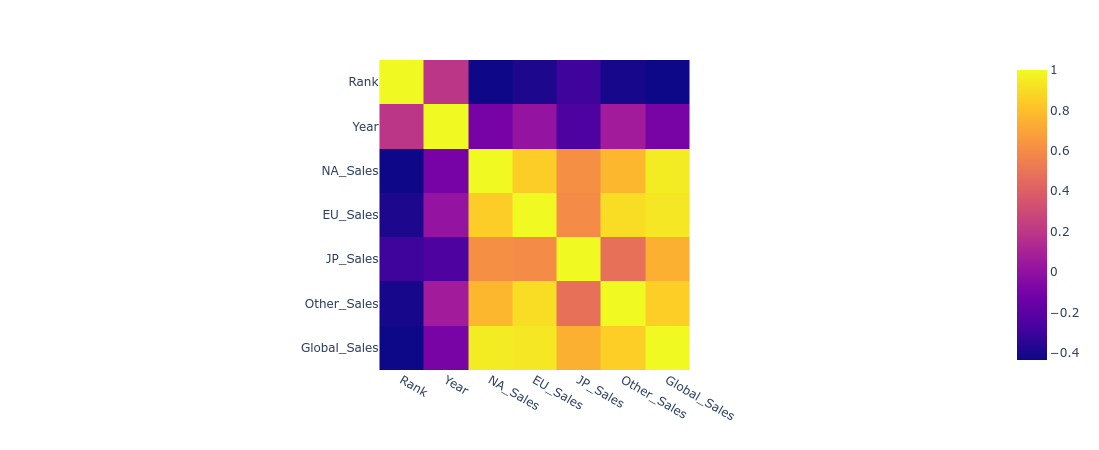

-----------
**QUESTION:**

What's going on with `Rank` and the `*_Sales` variables?

**ANSWER: (click here to edit)**


<hr>

Do a scatterplot matrix to see the relationships between these variables.

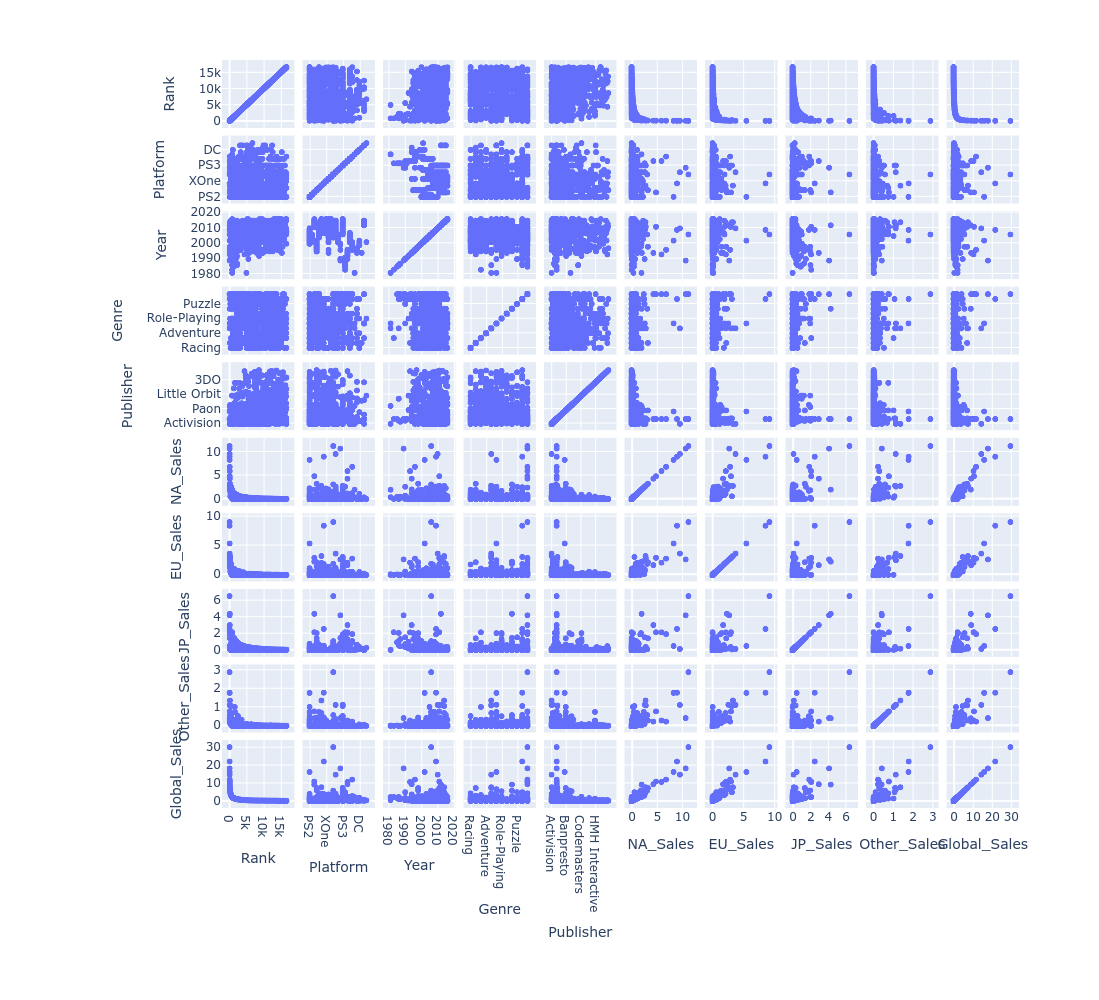

-----------
**QUESTION:**

Take a look at the scatterplots of the nominal variables against the `Global_Sales`. 
Is there any obvious pattern?

**ANSWER: (click here to edit)**


<hr>

Make a histogram of `Global_Sales` so we can see how it is distributed.

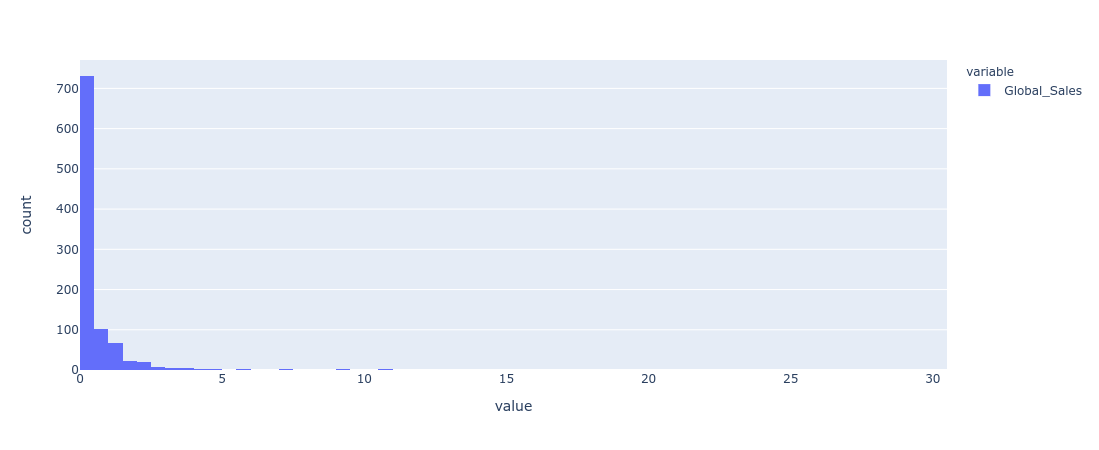

------------------
**QUESTION:**

Do you think we need to transform `Global_Sales` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**


<hr>

## Prepare train/test sets

### X, Y, and dummies

Make a new dataframe called `X` by either dropping all the sales related variables or creating a dataframe with just the columns you want to keep.

Import `numpy` to square root transform `Y`.

Save a dataframe with just `Global_Sales` in `Y`, but use `numpy` to log transform in a freestyle block: `np.sqrt(dataframe[[ "Global_Sales"]])`.

Replace the nominal variables with dummies and save in `X`.

Year  ...  Publisher_Zoo Games
Name                                                       ...                     
SCORE International Baja 1000: The Official Game   2008.0  ...                    0
Backyard Wrestling 2: There Goes the Neighborhood  2004.0  ...                    0
Cardfight!! Vanguard: Ride to Victory              2013.0  ...                    0
Gold and Glory: The Road to El Dorado              2000.0  ...                    0
Miyako                                             2010.0  ...                    0
...                                                   ...  ...                  ...
Magicka                                            2011.0  ...                    0
Sega Ages 2500 Series Vol. 26: Dynamite Deka       2006.0  ...                    0
Pro Yakyuu Team o Tsukurou!                        1999.0  ...                    0
Shrek Swamp Kart Speedway                          2002.0  ...                    0
Adidas Power Soccer 98                             1998.0  ...                    0

[986 rows x 195 columns]

### Train/test splits

Import `sklearn.model_selection`.

Create the data splits. 
Make sure to use `random_state=1` so we get the same answers.
Don't bother stratifying.

## Fit model

Since the response/target variable is numeric, we need to use a gradient boosting regressor rather than a classifier.

Import `sklearn.ensemble`.

Create the gradient boosting regressor, using `random_state=1` and `subsample=.5`.

`fit` the classifier.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Get  and save predictions.

## Evaluate the model

Because this is regression not classification, you can't use classification metrics like accuracy, precision, recall, and f1.
Instead, you'll use $r^2$.
Some examples are in the `Regression-trees-PS` notebook.

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

Training r2:0.6265236622548307
Testing r2:-0.08372464930141921


------------------
**QUESTION:**

Compare the *training data performance* to the *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**


<hr>

## Visualizing

### Feature importance

Visualize feature importance using a bar chart.

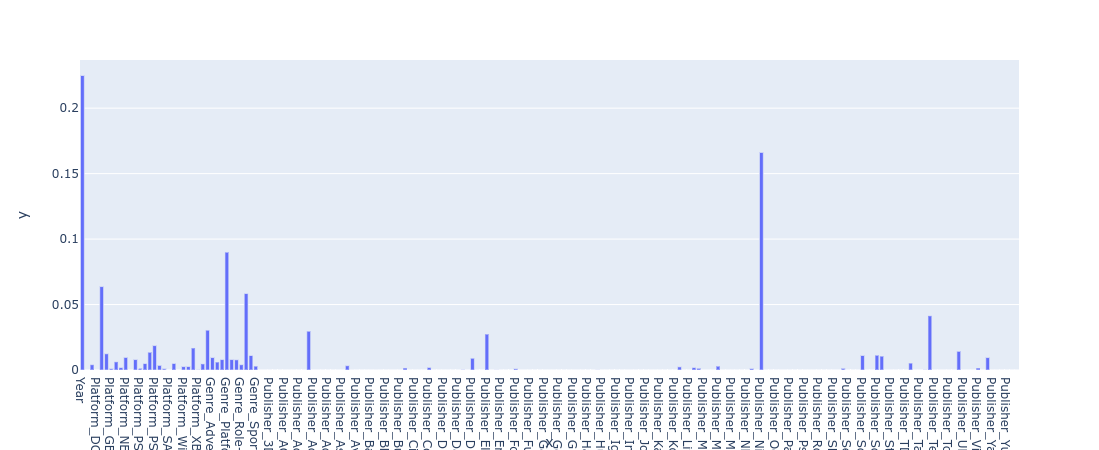

------------------
**QUESTION:**

Hover over the bars to see the corresponding predictor and value. 
What are the most important features?

**ANSWER: (click here to edit)**


<hr>

### Overfit

Use the OOB error to test if the model is overfit.

Import `plotly.graph_objects`

Create an empty figure to draw lines on.

And add the two lines, one for training deviance and one for testing deviance.

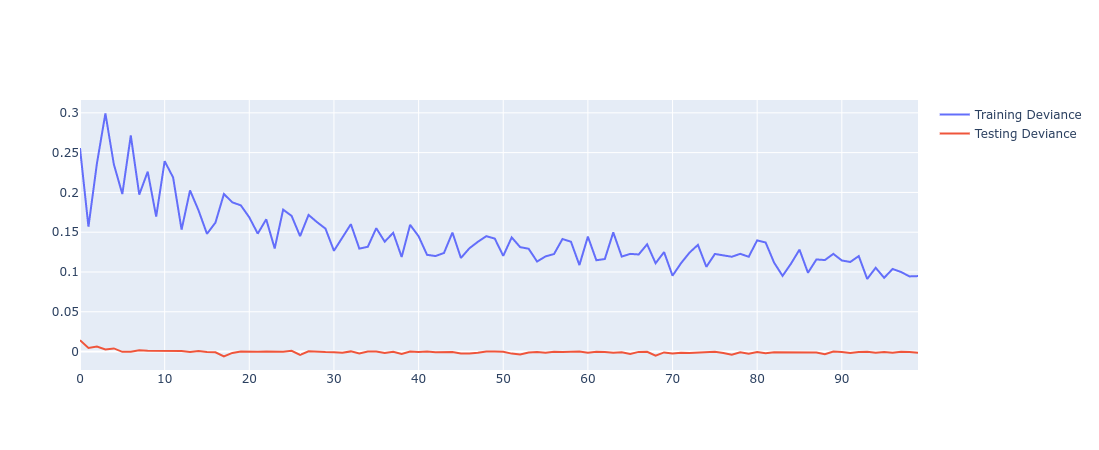

------------------
**QUESTION:**

Do you think it would help our test data performance if we stopped training earlier? Why?

**ANSWER: (click here to edit)**


<hr>

**QUESTION:**

Now that you are familiar with this data and how gradient boosting performed with it, what other models would you try?

**ANSWER: (click here to edit)**


<hr>

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
